In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


In [ ]:
# Info about dataset
print("\nDataset Info:\n")
print(df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include="all"))



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          

In [ ]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'], errors='ignore')


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Overall survival rate
print("Overall Survival Rate:", df['Survived'].mean())

# Survival by gender
print("\nSurvival by Gender:\n", df.groupby('Sex')['Survived'].mean())

# Survival by class
print("\nSurvival by Class:\n", df.groupby('Pclass')['Survived'].mean())

# Survival by gender and class
print("\nSurvival by Gender & Class:\n",
      df.pivot_table(values='Survived', index='Sex', columns='Pclass'))


Overall Survival Rate: 0.3838383838383838

Survival by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival by Gender & Class:
 Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


/tmp/ipython-input-1779808823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


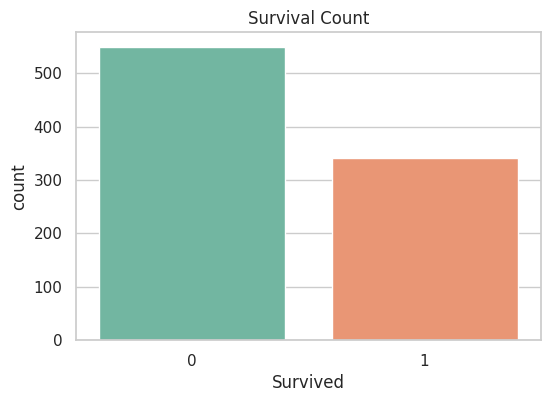

/tmp/ipython-input-1779808823.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='Set1')


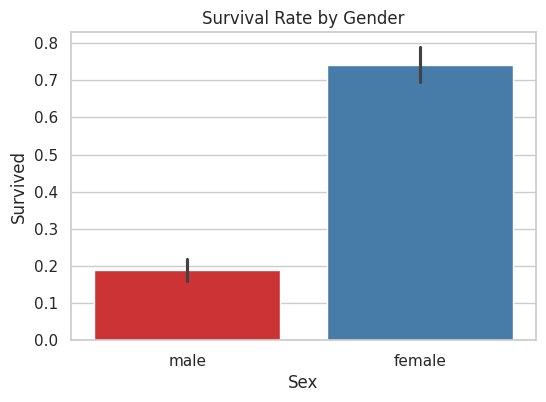

/tmp/ipython-input-1779808823.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')


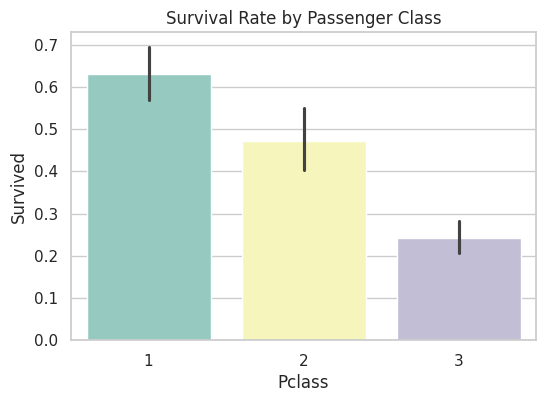

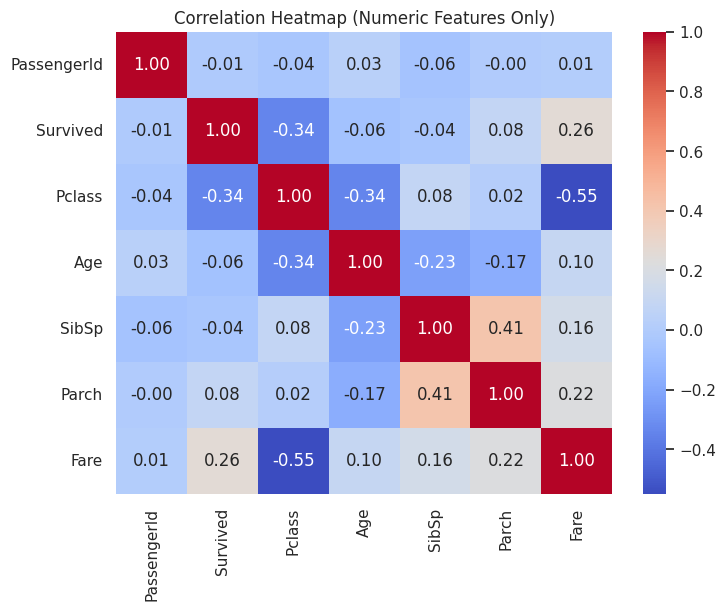

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survival count (bar chart)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.show()

# 2. Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()

# 3. Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Passenger Class')
plt.show()

# 4. Correlation Heatmap (numeric only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


/tmp/ipython-input-1546337270.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


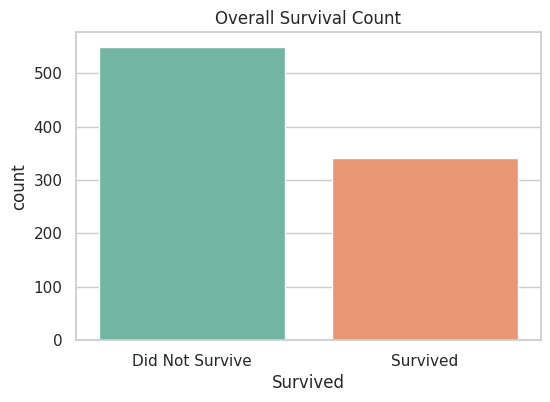

/tmp/ipython-input-1546337270.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="Set1")


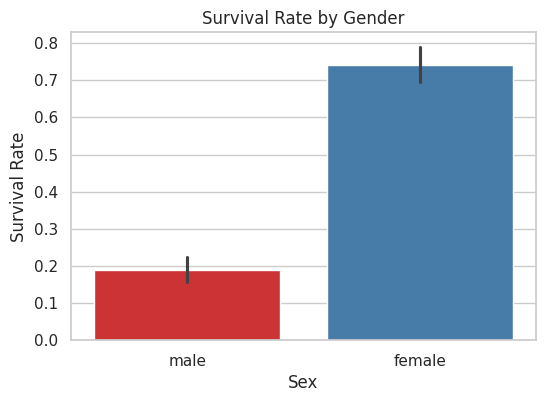

/tmp/ipython-input-1546337270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="Set3")


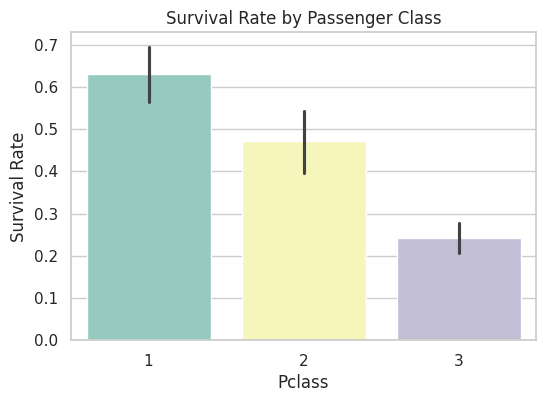

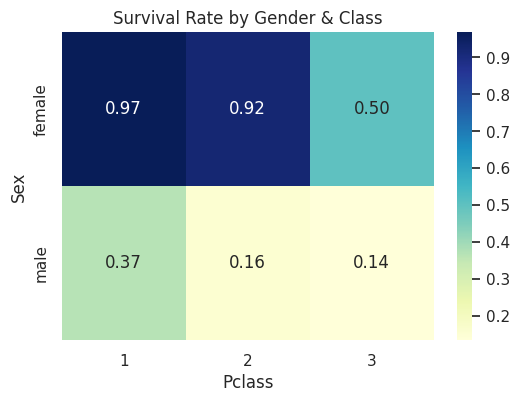

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set(style="whitegrid")

# 1. Overall survival count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Overall Survival Count")
plt.xticks([0,1], ["Did Not Survive", "Survived"])
plt.show()

# 2. Survival by gender
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df, palette="Set1")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# 3. Survival by class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df, palette="Set3")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# 4. Survival by gender & class (heatmap)
pivot = df.pivot_table(values="Survived", index="Sex", columns="Pclass")
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rate by Gender & Class")
plt.show()


Overall Survival Rate: 0.3838383838383838

Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival by Gender & Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


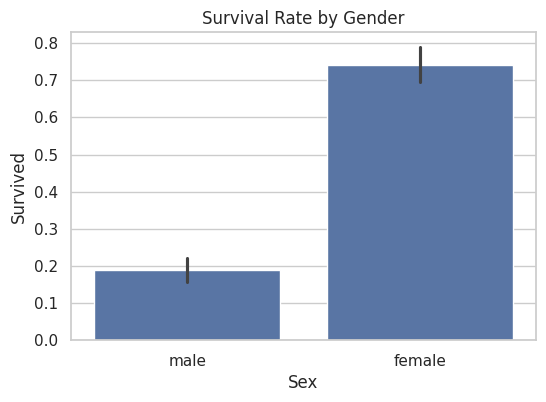

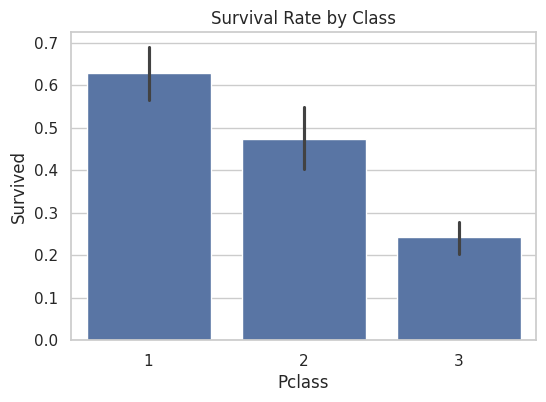

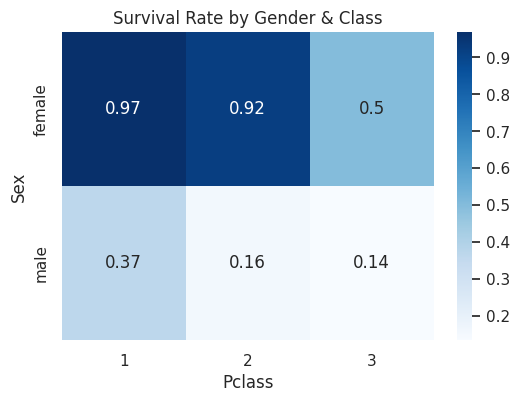

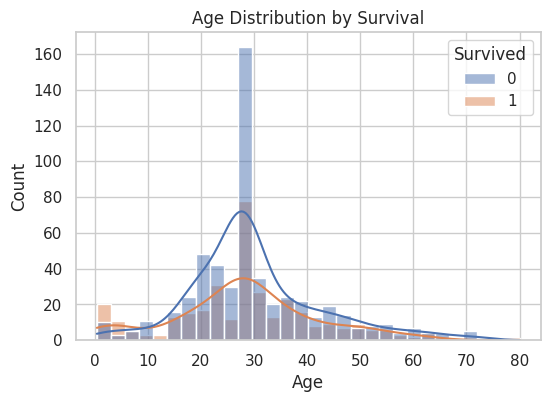

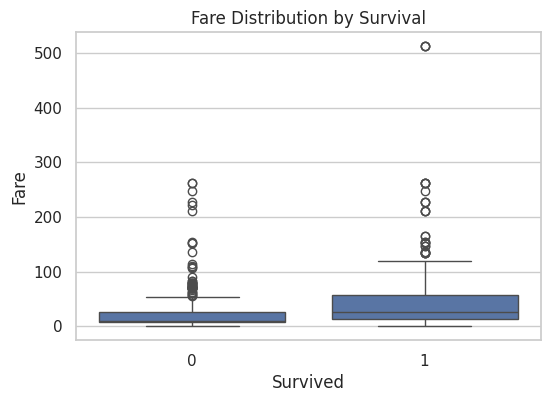

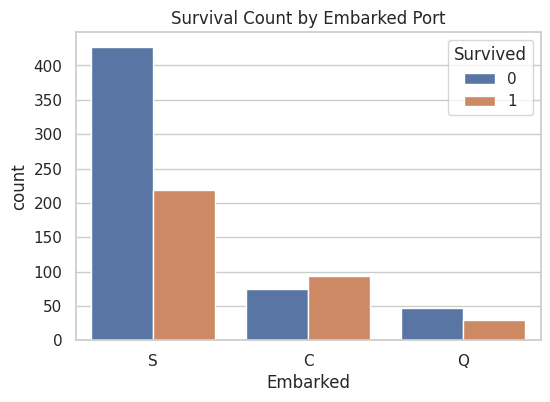

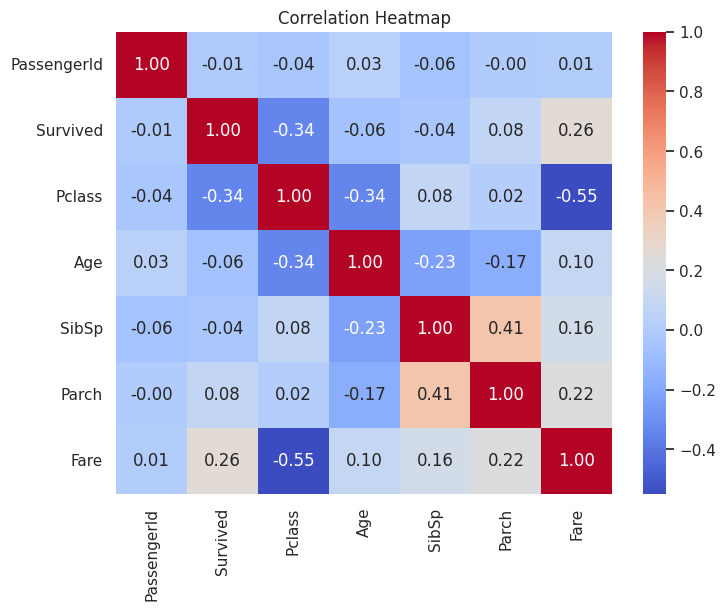

In [ ]:
# --- 1. Basic Data Cleaning (already done earlier) ---
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'], errors='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Survival Rates (Target-focused Visualizations) ---
print("Overall Survival Rate:", df['Survived'].mean())

print("\nSurvival by Gender:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival by Class:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival by Gender & Class:")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack())

# Bar Plot: Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Bar Plot: Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.show()

# Heatmap: Survival by Gender & Class
plt.figure(figsize=(6,4))
sns.heatmap(df.groupby(['Sex','Pclass'])['Survived'].mean().unstack(), annot=True, cmap="Blues")
plt.title("Survival Rate by Gender & Class")
plt.show()


# --- 3. Key Patterns & Correlations (Feature-focused Visualizations) ---
# Distribution of Age by Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Boxplot of Fare by Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.show()

# Countplot of Embarked by Survival
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival Count by Embarked Port")
plt.show()

# Correlation Heatmap (only numeric features)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
